In [1]:
from pathlib import Path
from ipyleaflet import Map, LayersControl, LayerGroup, Polygon, GeoJSON, LegendControl, FullScreenControl, basemaps, basemap_to_tiles
from ipywidgets.embed import embed_minimal_html
import json
import random
from tqdm.auto import tqdm
import pandas as pd
from itertools import chain
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
#from shapely.geometry import Point, LineString
from geojson import Feature, LineString
import numpy as np
import geopandas as gpd
from geojson_length import calculate_distance, Unit
from shapely.geometry import Point as geoPoint, Polygon as geoPolygon
from shapely import wkt
import geojson
from pyproj import Geod
from area import area
import random
import networkx as nx
import matplotlib.pyplot as plt
import math

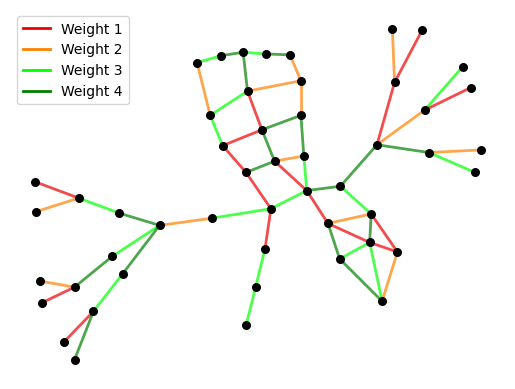

In [2]:
weight =  {
('a','c'): 1,
('b','c'): 2,
('c','d'): 3,
('d','e'): 4,
('f','h'): 2,
('g','h'): 1,
('h','i'): 4,
('i','e'): 3,
('j','l'): 1,
('k','l'): 4,
('l','m'): 3,
('m','e'): 4,
('e','n'): 2,
('n','o'): 3,
('o','p'): 1,
('p','q'): 4,
('q','r'): 3,
('q','k1'): 2,
('q','t'): 2,
('p','s'): 1,
('s','v'): 3,
('v','e1'): 2,
('e1','d1'): 3,
('d1','c1'): 4,
('c1','b1'): 3,
('b1','a1'): 4,
('o','k1'): 3,
('k1','q'): 1,
('k1','r'): 3,
('q','r'): 2,
('q','t'): 4,
('t','w'): 1,
('w','c1'): 4,
('v','w'): 3,
('t','s'): 1,
('r','u'): 4,
('u','z'): 2,
('z','a1'): 2,
('w','z'): 2,
('u','t'): 4,
('o','g1'): 1,
('g1','h1'): 3,
('h1','i1'): 3,
('k1','f1'): 4,
('f1','l1'): 3,
('l1','n1'): 1,
('n1','o1'): 2,
('k1','j1'): 1,
('j1','m1'): 4,
('m1','o1'): 4,
('j1','l1'): 2,
('j1','b2'): 1,
('l1','b2'): 4,
('m1','b2'): 3,
('b2','o1'): 3,
('b2','n1'): 1,
('f1','p1'): 4,
('p1','q1'): 1,
('q1','r1'): 2,
('q1','s1'): 1,
('p1','t1'): 2,
('t1','u1'): 3,
('t1','v1'): 1,
('p1','w1'): 4,
('w1','z1'): 2,
('w1','a2'): 3,
}
G = nx.Graph()
for endpoints, weight in weight.items():
    G.add_edge(endpoints[0], endpoints[1], weight=weight)

# shift_weight =  {1: 4, 2: 3, 3: 2, 4: 1}
# for endpoint1, endpoint2, data in G.edges(data=True):
#     data['weight'] = shift_weight[data['weight']]
colors =  {1: '#EE0000', 2: '#FF8000', 3: '#00FF00', 4: '#008000'}

# Get the positions of the nodes (using the node coordinates as positions)
pos = {
'a' : np.array([-5.0215337305401,1.223265423794]),
'b' : np.array([-5.001068614261,0.7730328656544]),
'c' : np.array([-4.2438593119354,0.9776840284451]),
'd' : np.array([-3.527580242168,0.7525677493754]),
'e' : np.array([-2.8113011724005,0.5683817028637]),
'f' : np.array([-4.9340970450932,-0.2655990708621]),
'g' : np.array([-4.8978310930543,-0.5919926392119]),
'h' : np.array([-4.3175758604326,-0.3562639509593]),
'i' : np.array([-3.6466557477137,0.1061269375362]),
'j' : np.array([-4.5079721086366,-1.1813143598433]),
'k' : np.array([-4.3175758604326,-1.444242512125]),
'l' : np.array([-3.9821158040731,-0.7189234713479]),
'm' : np.array([-3.4653259875194,-0.1568012147456]),
'n' : np.array([-1.8893288932625,0.6754002207058]),
'o' : np.array([-0.8403397686802,0.8178555339206]),
'p' : np.array([-1.2806561913444,1.3617758207411]),
'q' : np.array([-0.7755873535826,1.530132099995]),
'r' : np.array([-0.2575680328012,1.6078349981123]),
's' : np.array([-1.6950716479695,1.7632407943467]),
't' : np.array([-1,2]),
'u' : np.array([-0.3093699648793,2.2165077000304]),
'v' : np.array([-1.9152298593016,2.2165077000304]),
'w' : np.array([-1.2547552253053,2.5791212245774]),
'z' : np.array([-0.3093699648793,2.7345270208118]),
'a1' : np.array([-0.5036272101723,3.1230415113978]),
'b1' : np.array([-0.930993149817,3.1359919944174]),
'c1' : np.array([-1.3324581234225,3.1618929604564]),
'd1' : np.array([-1.7209726140086,3.1100910283783]),
'e1' : np.array([-2.1483385536532,3.006487164222]),
'f1' : np.array([0.3899561181756,1.1545680924285]),
'g1' : np.array([-0.9439436328365,0.222133315022]),
'h1' : np.array([-1.1122999120905,-0.360638420857]),
'i1' : np.array([-1.2806561913444,-0.9304596737166]),
'j1' : np.array([0.1697979068435,0.5976973225885]),
'k1' : np.array([-0.205766100723,1.0898156773309]),
'l1' : np.array([0.933876404996,0.7401526358034]),
'm1' : np.array([0.377005635156,0.0667275187876]),
'n1' : np.array([1.4000937936993,0.1703313829439]),
'o1' : np.array([1.1281336502891,-0.5678461491696]),
'p1' : np.array([1.0374802691523,1.7761912773662]),
'q1' : np.array([1.3482918616211,2.7086260547727]),
'r1' : np.array([1.3094404125625,3.5115560019839]),
's1' : np.array([1.8404102163635,3.4986055189643]),
't1' : np.array([1.8792616654221,2.2942105981476]),
'u1' : np.array([2.5526867824379,2.9417347491243]),
'v1' : np.array([2.6951420956528,2.6309231566555]),
'w1' : np.array([1.9569645635393,1.6596369301904]),
'z1' : np.array([2.8764488579263,1.698488379249]),
'a2' : np.array([2.77284499377,1.3617758207411]),
'b2' : np.array([0.907975438957,0.3127866961588])
}

nx.draw_networkx_nodes(G, pos, node_color='black', node_size=30)
for u, v, data in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=colors[data['weight']], width=2, alpha=0.7)

# Add a legend for the edge colors
handles = [plt.Line2D([], [], color=colors[weight], lw=2) for weight in colors]
labels = [f"Weight {weight}" for weight in colors]
plt.legend(handles, labels)

# Show the plot
# plt.show()

# plt.legend(loc='upper left')
plt.axis('off')
plt.savefig('./Images/academic_example.png', dpi=800)
plt.show()

In [3]:
def degree_G(G):
    '''
    ----------
     Parameters
     ----------
     G: networkx weighted graph.

     dw: dictionary
         links as the keys and weights as the values
     --------
     Returns:
     --------
     dd: dictionary
         keys as the nodes, and degrees of the respectively nodes as values
    '''
    H = G.degree(weight='weight')
    dd = {}
    for i in list(H):
        dd[i[0]] = i[1]
    return dd

In [4]:
def create_second_graph(G):
    # Create a new graph with the same nodes as G
    G2 = nx.Graph()
    G2.add_nodes_from(G.nodes())

    # Add edges to G2 with key=1 and weight=weight/key
    for endpoint1, endpoint2, data in G.edges(data=True):
        G2.add_edge(endpoint1, endpoint2, weight=4)

    return G2
G2 = create_second_graph(G)

In [5]:
for endpoint1, endpoint2, data in G.edges(data=True):
    print(endpoint1, endpoint2, data['weight'])

a c 1
c b 2
c d 3
d e 4
e i 3
e m 4
e n 2
f h 2
h g 1
h i 4
j l 1
l k 4
l m 3
n o 3
o p 1
o k1 3
o g1 1
p q 4
p s 1
q r 2
q k1 1
q t 4
r k1 3
r u 4
k1 f1 4
k1 j1 1
t w 1
t s 1
t u 4
s v 3
v e1 2
v w 3
e1 d1 3
d1 c1 4
c1 b1 3
c1 w 4
b1 a1 4
a1 z 2
w z 2
u z 2
g1 h1 3
h1 i1 3
f1 l1 3
f1 p1 4
l1 n1 1
l1 j1 2
l1 b2 4
n1 o1 2
n1 b2 1
o1 m1 4
o1 b2 3
j1 m1 4
j1 b2 1
m1 b2 3
p1 q1 1
p1 t1 2
p1 w1 4
q1 r1 2
q1 s1 1
t1 u1 3
t1 v1 1
w1 z1 2
w1 a2 3


In [6]:
for endpoint1, endpoint2, data in G2.edges(data=True):
    print(endpoint1, endpoint2, data['weight'])

a c 4
c b 4
c d 4
d e 4
e i 4
e m 4
e n 4
f h 4
h g 4
h i 4
j l 4
l k 4
l m 4
n o 4
o p 4
o k1 4
o g1 4
p q 4
p s 4
q r 4
q k1 4
q t 4
r k1 4
r u 4
k1 f1 4
k1 j1 4
t w 4
t s 4
t u 4
s v 4
v e1 4
v w 4
e1 d1 4
d1 c1 4
c1 b1 4
c1 w 4
b1 a1 4
a1 z 4
w z 4
u z 4
g1 h1 4
h1 i1 4
f1 l1 4
f1 p1 4
l1 n1 4
l1 j1 4
l1 b2 4
n1 o1 4
n1 b2 4
o1 m1 4
o1 b2 4
j1 m1 4
j1 b2 4
m1 b2 4
p1 q1 4
p1 t1 4
p1 w1 4
q1 r1 4
q1 s1 4
t1 u1 4
t1 v1 4
w1 z1 4
w1 a2 4


In [7]:
closeness_G = degree_G(G)
closeness_G2 = degree_G(G2)
print(closeness_G)
print(closeness_G2)

{'a': 1, 'c': 6, 'b': 2, 'd': 7, 'e': 13, 'f': 2, 'h': 7, 'g': 1, 'i': 7, 'j': 1, 'l': 8, 'k': 4, 'm': 7, 'n': 5, 'o': 8, 'p': 6, 'q': 11, 'r': 9, 'k1': 12, 't': 10, 's': 5, 'v': 8, 'e1': 5, 'd1': 7, 'c1': 11, 'b1': 7, 'a1': 6, 'w': 10, 'u': 10, 'z': 6, 'g1': 4, 'h1': 6, 'i1': 3, 'f1': 11, 'l1': 10, 'n1': 4, 'o1': 9, 'j1': 8, 'm1': 11, 'b2': 12, 'p1': 11, 'q1': 4, 'r1': 2, 's1': 1, 't1': 6, 'u1': 3, 'v1': 1, 'w1': 9, 'z1': 2, 'a2': 3}
{'a': 4, 'c': 12, 'b': 4, 'd': 8, 'e': 16, 'f': 4, 'h': 12, 'g': 4, 'i': 8, 'j': 4, 'l': 12, 'k': 4, 'm': 8, 'n': 8, 'o': 16, 'p': 12, 'q': 16, 'r': 12, 'k1': 20, 't': 16, 's': 12, 'v': 12, 'e1': 8, 'd1': 8, 'c1': 12, 'b1': 8, 'a1': 8, 'w': 16, 'u': 12, 'z': 12, 'g1': 8, 'h1': 8, 'i1': 4, 'f1': 12, 'l1': 16, 'n1': 12, 'o1': 12, 'j1': 16, 'm1': 12, 'b2': 20, 'p1': 16, 'q1': 12, 'r1': 4, 's1': 4, 't1': 12, 'u1': 4, 'v1': 4, 'w1': 12, 'z1': 4, 'a2': 4}


C:\Users\camperom\AppData\Local\Temp\ipykernel_16676\1311278899.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))
C:\Users\camperom\AppData\Local\Temp\ipykernel_16676\1311278899.py:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


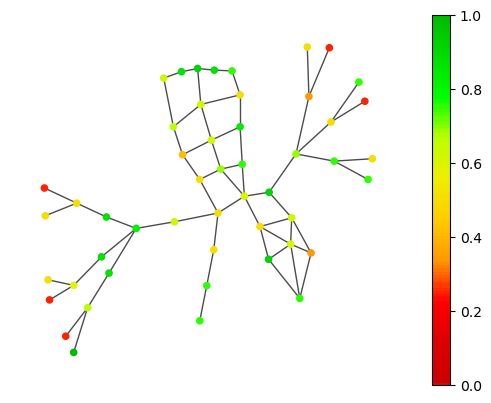

[0.25, 0.5, 0.5, 0.875, 0.8125, 0.5, 0.5833333333333334, 0.25, 0.875, 0.25, 0.6666666666666666, 1.0, 0.875, 0.625, 0.5, 0.5, 0.6875, 0.75, 0.6, 0.625, 0.4166666666666667, 0.6666666666666666, 0.625, 0.875, 0.9166666666666666, 0.875, 0.75, 0.625, 0.8333333333333334, 0.5, 0.5, 0.75, 0.75, 0.9166666666666666, 0.625, 0.3333333333333333, 0.75, 0.5, 0.9166666666666666, 0.6, 0.6875, 0.3333333333333333, 0.5, 0.25, 0.5, 0.75, 0.25, 0.75, 0.5, 0.75]
0.6244166666666666


In [10]:
edge_colors = {1: '#EE0000', 2: '#FF8000', 3: '#00FF00', 4: '#008000'}
shift_weight =  {1: 4, 2: 3, 3: 2, 4: 1}

def plot_degree_ratio(G, G2):
    # Compute the degree of each node in G taking into account the weights of the edges
    degree_G = dict(G.degree(weight='weight'))

    # Compute the degree of each node in G2 taking into account the weights of the edges
    degree_G2 = dict(G2.degree(weight='weight'))

    # Compute the ratio of the degree of each node in G to the degree of the same node in G2
    ratio = [(degree_G[node]/degree_G2[node])*100 for node in G.nodes()]
    ratio = []
    s1 = 0
    s2 = 0
    for node in G.nodes():
        d1 = degree_G[node]
        d2 = degree_G2[node]
        s1 = s1 + d1
        s2 = s2 + d2
        ratio.append(d1/d2)

    # Create a color map for the nodes based on the ratio values
    cmap = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))
    # node_colors = [cmap(r) for r in ratio]
    # norm = plt.Normalize(vmin=min(ratio), vmax=max(ratio))
    # node_colors = [cmap(norm(ratio[i])) for i in range(len(G.nodes()))]
    # norm = plt.Normalize(vmin=min(ratio), vmax=max(ratio))
    node_colors = [cmap(ratio[i]) for i in range(len(G.nodes()))]

    # Create a color map for the edges based on the weights
    # edge_colors_1 = [edge_colors[G[u][v]['weight']] for u, v in G.edges()]
    edge_colors_1 = [edge_colors[weight] for u, v, weight in G.edges(data='weight')]
    # Draw the graph with nodes and edges colored according to the ratio and weight values
    # pos = nx.spring_layout(G)
    # nx.draw_networkx_nodes(G, pos, node_color='#000000', node_size=30)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=20)
    # nx.draw_networkx_edges(G, pos, edge_color=edge_colors_1, width=3, alpha=0.7)
    nx.draw_networkx_edges(G, pos, edge_color='#000000', width=1, alpha=0.7)
    plt.axis('off')

    # Add a colorbar for the ratio values
    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(ratio), vmax=max(ratio)))
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm._A = []
    plt.colorbar(sm)

    # Add a legend for the edge colors
    # handles = [plt.Line2D([], [], color=colors[weight], lw=2) for weight in reversed(colors)]
    # labels = [f"Safety level {weight}" for weight in reversed(colors)]
    # plt.legend(handles, labels, fontsize='small')
    plt.savefig('./Images/ae_degree_centrality.png', dpi=800)
    # plt.savefig('./Images/ae_edge_colors.png', dpi=800)
    # Show the plot
    plt.show()
    print(ratio)
    print(sum(ratio)/len(ratio))
plot_degree_ratio(G, G2)